This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
#num_words = 10000:選最常用的10000字
#train_data:影評文章（單字轉成數字）train_label:0負評,1正評

In [52]:
#?imdb.load_data

In [53]:
#train_data

In [9]:
train_data.shape

(25000,)

In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
train_labels.shape

(25000,)

In [4]:
max([max(sequence) for sequence in train_data]) #10000 words:0-9999資料不會有超過9999的數字

9999

**Decoding reviews back to text**

In [11]:
#數字弄回文字
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 2s 1us/step


In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [54]:
#word_index

In [55]:
#word_index.items()

In [56]:
#train_data[0]

In [57]:
word_index['this']

11

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

整數變成張量

In [21]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [44]:
x_train[0]

10000


In [23]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape = (10000,)), #第一層要給它input shape才可以建立模型
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [35]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [45]:
x_val = x_train[:10000] #割前面10000筆資料做驗證資料集（模擬考）
partial_x_train = x_train[10000:]#15000為訓練集（模擬考）
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#(train_data, train_lables),(test_data, test_labels)資料處理後變成->
#(   x_train,      y_train),(   x_test,      y_test)又把train分成->
#((partial_x_train, x_val)(partial_y_train y_val))

**Training your model**

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 68ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.4055 - val_accuracy: 0.9350
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 8.2289e-05 - accuracy: 1.0000 - val_loss: 0.4051 - val_accuracy: 0.9367
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 7.0856e-05 - accuracy: 1.0000 - val_loss: 0.4132 - val_accuracy: 0.9362
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 5.8959e-05 - accuracy: 1.0000 - val_loss: 0.4269 - val_accuracy: 0.9349
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 4.6982e-05 - accuracy: 1.0000 - val_loss: 0.4512 - val_accuracy: 0.9320
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 4.5672e-05 - accuracy: 1.0000 - val_loss: 0.5914 - val_accuracy: 0.9170
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 2.9573e-05 - accuracy: 1.0000 - val_loss: 0.4922 - val_accura

In [46]:
history_dict = history.history
history_dict.keys()
#驗證資料和訓練資料的loss,accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

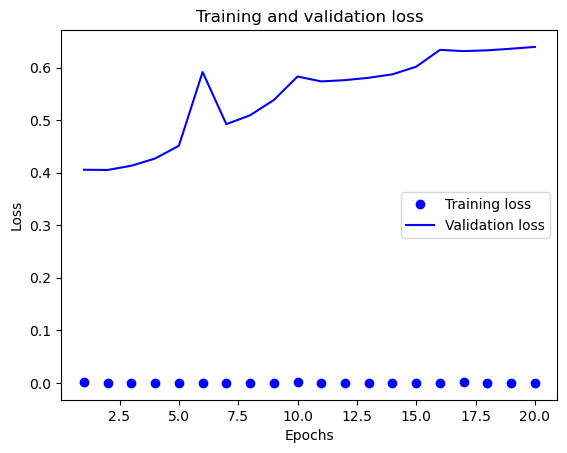

In [47]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Trainig loss 為考古的loss，越訓練死背能力越強
#Validation loss為學測loss，越訓練一般化能力越差

**Plotting the training and validation accuracy**

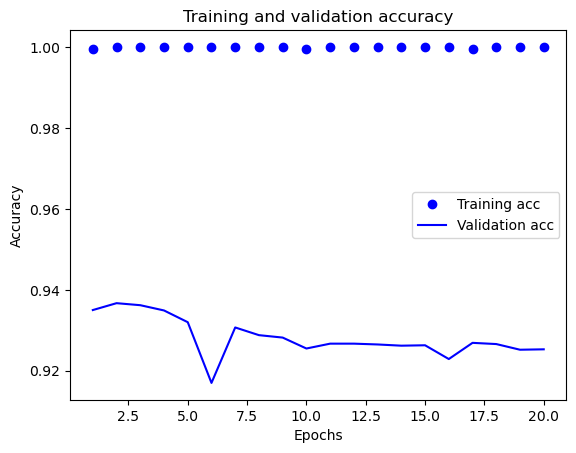

In [48]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [49]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 22ms/step - loss: 0.4467 - accuracy: 0.8221
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2564 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1979 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2952 - accuracy: 0.8842


In [50]:
results

[0.2951675057411194, 0.8842399716377258]

### Using a trained model to generate predictions on new data

In [51]:
model.predict(x_test)
#這篇文章是正評的機率

782/782 [==============================] - 2s 2ms/step


array([[0.17655836],
       [0.99992144],
       [0.8980991 ],
       ...,
       [0.15582474],
       [0.08425646],
       [0.6900681 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [58]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


In [59]:
len(train_data)

8982

In [60]:
len(test_data)

2246

In [61]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [62]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 2us/step


In [63]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [64]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [65]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [66]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [67]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [68]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 74ms/step - loss: 0.0121 - accuracy: 0.9977 - val_loss: 0.0781 - val_accuracy: 0.9862
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0101 - accuracy: 0.9981 - val_loss: 0.0840 - val_accuracy: 0.9845
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0913 - val_accuracy: 0.9825
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.1177 - val_accuracy: 0.9709
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.1112 - val_accuracy: 0.9755
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.1199 - val_accuracy: 0.9725
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.1411 - val_accuracy: 0.9672
Epoch 8/20
30

**Plotting the training and validation loss**

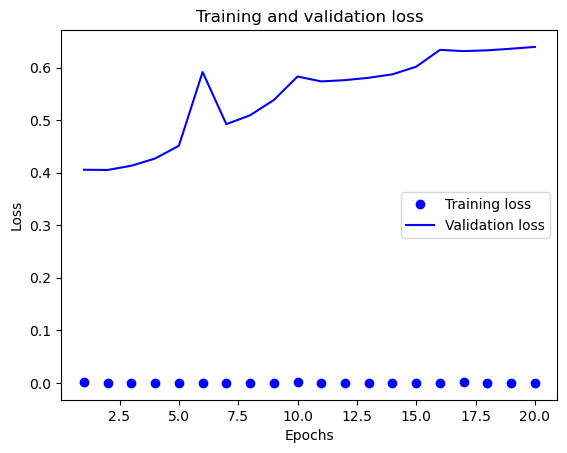

In [70]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

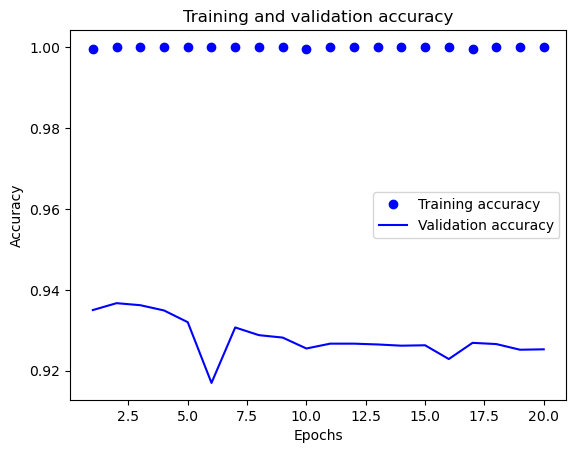

In [71]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [72]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 34ms/step - loss: 2.5456 - accuracy: 0.5593
Epoch 2/9
18/18 [==============================] - 1s 28ms/step - loss: 1.3569 - accuracy: 0.7104
Epoch 3/9
18/18 [==============================] - 1s 32ms/step - loss: 1.0021 - accuracy: 0.7882
Epoch 4/9
18/18 [==============================] - 0s 26ms/step - loss: 0.7808 - accuracy: 0.8397
Epoch 5/9
18/18 [==============================] - 0s 25ms/step - loss: 0.6169 - accuracy: 0.8746
Epoch 6/9
18/18 [==============================] - 0s 25ms/step - loss: 0.4881 - accuracy: 0.9007
Epoch 7/9
18/18 [==============================] - 0s 25ms/step - loss: 0.3935 - accuracy: 0.9176
Epoch 8/9
18/18 [==============================] - 0s 26ms/step - loss: 0.3171 - accuracy: 0.9319
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9349 - accuracy: 0.7947


In [73]:
results

[0.9348646998405457, 0.7947462201118469]

In [74]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18788958147818344

### Generating predictions on new data

In [75]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [76]:
predictions[0].shape

(46,)

In [77]:
np.sum(predictions[0])

0.9999999

In [78]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [79]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [80]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [81]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 2.8375 - accuracy: 0.4127 - val_loss: 1.9318 - val_accuracy: 0.6200
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.5516 - accuracy: 0.6684 - val_loss: 1.4535 - val_accuracy: 0.6720
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2338 - accuracy: 0.7209 - val_loss: 1.3572 - val_accuracy: 0.6930
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0833 - accuracy: 0.7427 - val_loss: 1.3324 - val_accuracy: 0.6970
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9793 - accuracy: 0.7506 - val_loss: 1.3210 - val_accuracy: 0.6960
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8962 - accuracy: 0.7646 - val_loss: 1.3150 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8278 - accuracy: 0.7705 - val_loss: 1.3405 - val_accuracy: 0.6930
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [82]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [83]:
train_data.shape

(404, 13)

In [84]:
test_data.shape

(102, 13)

In [85]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [86]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [87]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
import numpy as np
from tensorflow import keras
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

In [11]:
np.mean(all_scores)

2.3843400478363037

**Saving the validation logs at each fold**

In [12]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [13]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

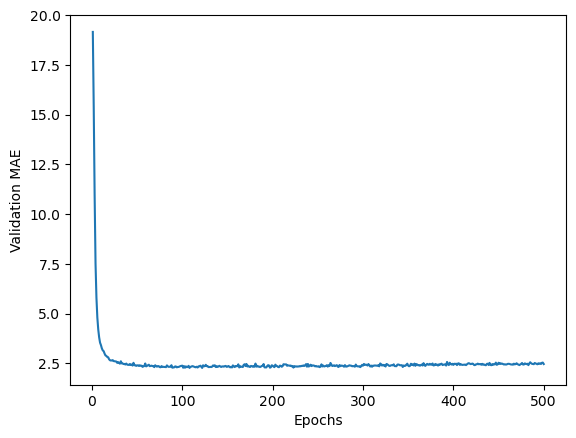

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

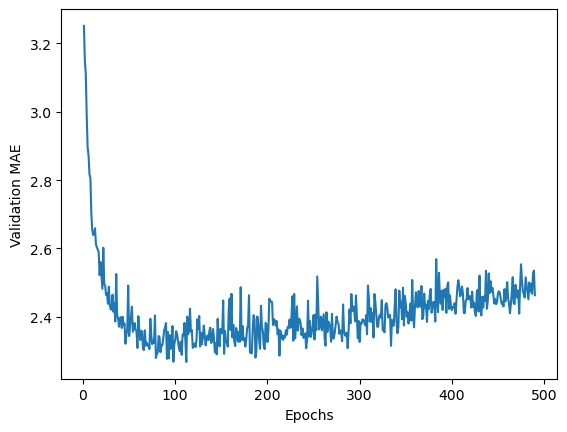

In [16]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [17]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.2045 - mae: 2.4146


In [18]:
test_mae_score

2.4145991802215576

### Generating predictions on new data

In [19]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.116923], dtype=float32)

### Wrapping up

## Summary